# Plot how this delay time evolves across the day for the five most used stations in Belgium.

In [5]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)


Check the top 5 stations w.r.t. travelers

In [3]:
stations = data.stations
travelers = data.travelers
trips = data.full_trips
travelers.sort_values(by = "sum", ascending = False).head(5)

NameError: name 'data' is not defined

Check the top 5 stations w.r.t. number of trains going to these stations

In [ ]:
pd_df = pd.DataFrame(trips["Name of the stop"].value_counts()).reset_index()
pd_df.columns = ["Name of the stop", "count"]
pd_df.head(5)

We assume that the most used stops are the ones that have the most amount of travelers.

In [ ]:
trips.sort_values(by ="Time of real arrival", ascending=False)
# They all arrive at "31-10" but this is wrong, we only need to look at the time part of this value.
trips["Time of real arrival"].dt.time

In [ ]:
trips = trips.merge(travelers[["Station", "sum"]], left_on=["Name of the stop"], right_on=["Station"], how="left")
trips = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central") | (trips["Name of the stop"] == "gent-sint-pieters") | (trips["Name of the stop"] == "antwerpen-centraal")]

trips = trips.sort_values(by = ["Station", "Time of real departure"])
trips

Some delay times are impossible, also see Q11 , so we delete the delete these.

In [ ]:
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips.sort_values(by = "Delay time", ascending = False)

We see that that most delay occurs at the peak hours: when people go to work / home: around 6-9 am and 16-19pm
The main issue lies within Brussels, y axis up to 250 min...

In [ ]:
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    plt.figure(figsize=(20,10))
    plt.title("Average daily delay in minutes for "+station)
    plt.xlabel("Time of real arrival")
    plt.ylabel("Delay time")
    plt.xticks(np.arange(0, 24, 1))
    plt.hist(x= trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color=np.random.rand(3,), bins = 100)
    plt.show()

We can also plot them on top of each other

In [ ]:
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Time of real arrival")
ax.set_ylabel("Delay time")
ax.set_title("Average delay time per station")
plt.legend(trips["Name of the stop"].unique())
plt.xticks(np.arange(0, 24, 1))


plt.show()

We group brussels together, for the sake of visibility and similarity.

In [ ]:
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Time of real arrival")
ax.set_ylabel("Delay time")
ax.set_title("Average delay time per station")
plt.legend(trips["Name of the stop"].unique())
plt.xticks(np.arange(0, 24, 1))


plt.show()

In [ ]:

fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
for station in  ["brussel-centraal/bruxelles-central", "brussel-noord/bruxelles-nord", "brussel-zuid/bruxelles-midi"]:
    color = "red"
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.30, label = station, edgecolor = "black")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Delay time in minutes")
ax.set_title("Average delay time per station")
plt.legend()
plt.xticks(np.arange(0, 24, 1))

for station in ["gent-sint-pieters", "antwerpen-centraal"]:
    color = "green"
    # color = ["#ff00ff", "#ffe4c4", "#000080", "#006400", "red"][trips["Name of the stop"].unique().tolist().index(station)]
    plt.hist(trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color = color, bins = 50, alpha = 0.8, label = station, edgecolor = "black")

plt.legend()

plt.show()

We see that the biggest amonunt of delay time is in Brussels

In [ ]:
trips["Name of the stop"].unique()

Plot the 5 stations of brussels on a map

In [12]:
provinces = data.provinces
stations = data.stations
map_brussels = data.map_brussels
map_brussels


,ID,VERSIONID,NAME_FRE,NAME_DUT,COUNTRY,NAT_CODE,NAT_LEVEL,AREA,LEGAL_STAT,INSPIRE_ID,BEGIN_LIFE,END_LIFE,geometry
0,1,2,RÃ©gion de Bruxelles-Capitale,Brussels Hoofdstedelijk Gewest,BE,4000,None,1.624237e+08,NOTAGREED,BE.BRUSSELS.BRIC.ADM.RE.1,2017-12-12,None,"POLYGON ((141192.634 167690.231, 141198.394 16..."


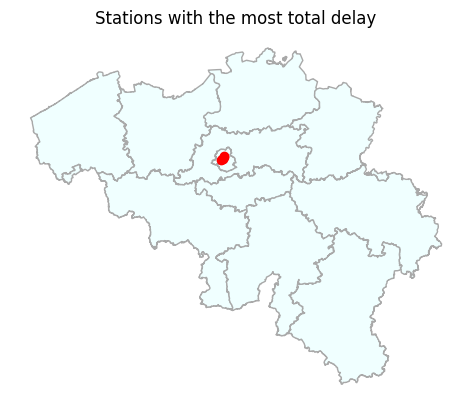

In [16]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
plt.scatter(stations[stations["name"].isin(["Brussel-Centraal/Bruxelles-Central", "Brussel-Noord/Bruxelles-Nord", "Brussel-Kapellekerk/Bruxelles-Chapelle", "Brussel-Congres/Bruxelles-Congrès", "Brussel-Zuid/Bruxelles-Midi"])]["longitude"], stations[stations["name"].isin(["Brussel-Centraal/Bruxelles-Central", "Brussel-Noord/Bruxelles-Nord", "Brussel-Kapellekerk/Bruxelles-Chapelle", "Brussel-Congres/Bruxelles-Congrès", "Brussel-Zuid/Bruxelles-Midi"],)]["latitude"], color = "red")
# add a x label

ax.axis('off')
plt.title("Stations with the most total delay")
plt.show()
